# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
df = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
df = df.dropna()
category = df.groupby('NAME_CONTRACT_TYPE').count()
category = category['SK_ID_CURR'].reset_index()
category.columns = ['contract type', 'count']
print(category)

     contract type  count
0       Cash loans   7660
1  Revolving loans    942


In [11]:
cash = []
revolve = []
for ContractType, income in zip(df['NAME_CONTRACT_TYPE'],df['AMT_INCOME_TOTAL']):
    if ContractType == 'Cash loans':
        cash.append(income)
    else:
        revolve.append(income)
print('cash loan income range :'+str(min(cash))+','+str(max(cash)))
print('revolve loan income range : '+str(min(revolve))+','+str(max(revolve)))

cash loan income range :33750.0,4500000.0
revolve loan income range : 49500.0,1350000.0


In [6]:
df['AMT_INCOME_TOTAL'].describe()

count    8.602000e+03
mean     2.228724e+05
std      1.414204e+05
min      3.375000e+04
25%      1.350000e+05
50%      1.935000e+05
75%      2.700000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

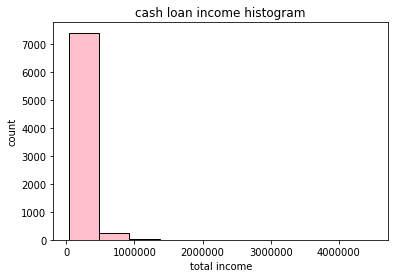

In [14]:
plt.hist(cash, edgecolor = 'black', facecolor = 'pink')
plt.xlabel('total income')
plt.ylabel('count')
plt.title('cash loan income histogram')
plt.show()

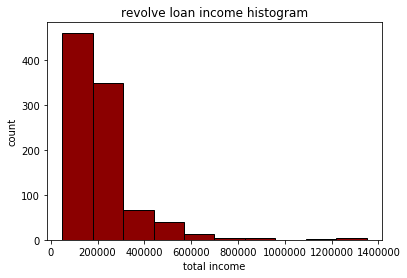

In [15]:
plt.hist(revolve, edgecolor = 'black', facecolor = 'darkred')
plt.xlabel('total income')
plt.ylabel('count')
plt.title('revolve loan income histogram')
plt.show()

從cash loan/revolve loan年收入直方圖可以觀察到兩者年收入分布都是右偏分布，顯示這份資料以中低收入戶(年收100萬以下)為主要資料來源外，也表示total income對於房屋貸款contract type的選擇並沒有顯著影響。